In [1]:
import pyodbc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

In [2]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER=;PORT=;DATABASE=;UID=;PWD=')


In [3]:
cursor = cnxn.cursor()

In [4]:
cnxn.setdecoding(pyodbc.SQL_WCHAR, encoding='utf-8')
cnxn.setencoding(encoding='utf-8')

In [5]:
cursor.execute("SELECT Category FROM ErrorLog")
row = cursor.fetchone()
if row:
    print(row)

('Customer Review Feed', )


In [7]:
errlog = cursor.execute("SELECT ErrorLogID, Category, Details, Exception, Date FROM ErrorLog GROUP BY Category, Details, Exception, Date, ErrorLogID")

In [8]:
rows = cursor.fetchall()

In [25]:
%matplotlib inline

In [10]:
df = pd.DataFrame( [[ij for ij in i] for i in rows] )
df.rename(columns={0: 'ID', 1: 'Category', 2: 'Details', 3: 'Exception', 4: 'Date'}, inplace=True);
df = df.sort_values(['Category'], ascending=[1]);

In [11]:
df.head()

,ID,Category,Details,Exception,Date
85,86,Application Reboot,User (AYYLEIUKORG1E) has initiated a 513 Serve...,None,2016-06-11 17:38:22.397
100,101,Application Reboot,User (AYYLEIUKORG1E) has initiated a 513 Serve...,None,2016-06-11 17:44:35.197
506,507,Application Reboot,User (A6RAIV7X91M1X) has initiated a 513 Serve...,None,2016-07-02 17:26:06.957
101,102,Application Reboot,User (AYYLEIUKORG1E) has initiated a 513 Serve...,None,2016-06-11 17:44:41.493
327,328,Application Reboot,User (AYYLEIUKORG1E) has initiated a 513 Serve...,None,2016-06-24 10:02:30.910


In [13]:
df.describe()

,ID
count,1975.00000
mean,988.00000
std,570.27771
min,1.00000
25%,494.50000
50%,988.00000
75%,1481.50000
max,1975.00000


In [14]:
df['Category'].describe()

count                     1975
unique                       4
top       Customer Review Feed
freq                      1832
Name: Category, dtype: object

In [31]:
df['Exception'].describe()

count                                                  1921
unique                                                   25
top       System.Net.WebException: The remote server ret...
freq                                                   1052
Name: Exception, dtype: object

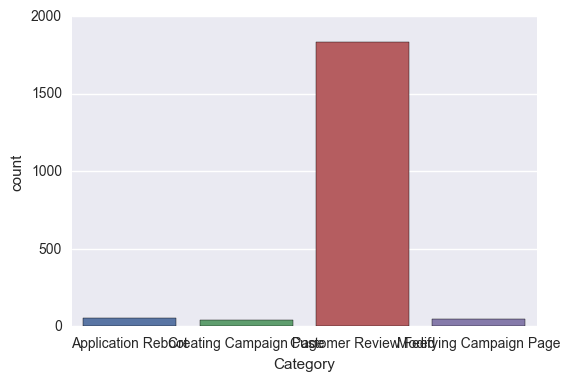

In [21]:
sb.countplot('Category', data = df)

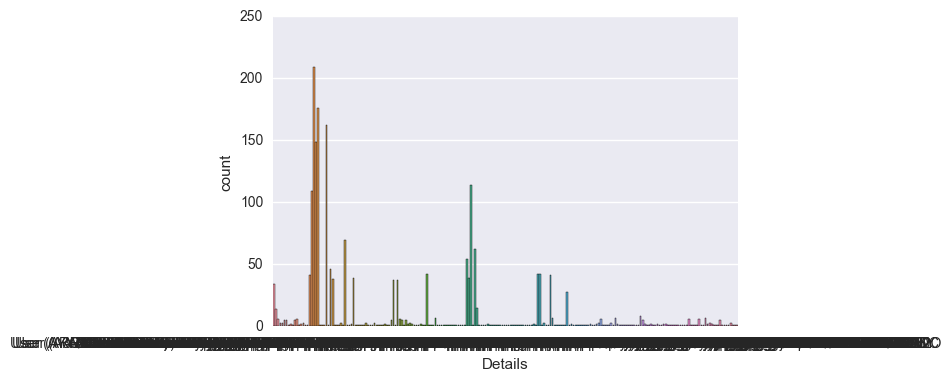

In [32]:
sb.countplot('Details', data = df)